## Linear methods for regression and classification
In this jupyter notebook, we will practice the topics covered in the lectures. Specially, we will do hands-on practice of:
- load and prepare data for machine learning model training and testing
- train and test linear models (linear regression (lasso/ridge), polynomial regression, and logistic regression)
- compare and understand model performance

For implementations that have fixed results, we provide running examples for your reference. *You might get slightly different results due to the sklearn version you are using, just leave a comment to indicate your version where you get different results.*<br>

## Linear Regression and Polynomial Regression
In this section, we will explore the diabetes dataset:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>

This dataset contains n = 442 diabetes patients' information of ten variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. Each patient has a quantitative value of disease progression one year after baseline.


We will fit different regression models to analyze this dataset:
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target variable <br>
    
2. Prepare data for model training and testing <br>

3. Fit different regression models (linear/lasso/ridge) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

**Note:** please always add comments to explain your observations/findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# there are different ways to load the dataset, please make sure you understand the mechanism
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
data = load_diabetes(as_frame=True)

### Basic dataset exploration

In [4]:
data.data.shape, data.target.shape

((442, 10), (442,))

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
np.round(data.frame.describe(),3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


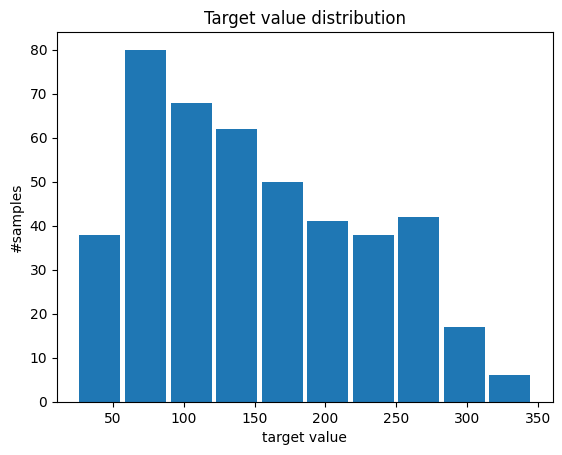

In [8]:
# plot a histogram to visualize the distribution of the "target" value
plt.hist(data.frame['target'], rwidth=0.9)
plt.title("Target value distribution")
plt.xlabel("target value")
plt.ylabel("#samples");

### Prepare data for model training and testing

In [9]:
# Split the data into 70% training and 30% testing
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Remember to set random_state to control for the randomness

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [10]:
# check feature matrix
X_train.shape, X_test.shape

((309, 10), (133, 10))

### Fit the linear regression model on the training set and evaluate model performance on the testing set
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
reg = LinearRegression() # check the documentation to understand the default parameters
reg.fit(X_train, y_train)
reg_score = reg.score(X_test, y_test)
np.round(reg_score,3)

0.477

**Interpret model coefficients and intercept**

In [12]:
np.round(reg.coef_,3)

array([  29.254, -261.706,  546.3  ,  388.398, -901.96 ,  506.763,
        121.154,  288.035,  659.269,   41.377])

In [13]:
np.round(reg.intercept_,3)

151.008

**Your task**: write down the linear regression model with the above coefficients and intercept

y = 29.254 * age - 261.706 * sex + 546.3 * bmi + 388.398 * bp - 901.96 * s1 + 506.763 * s2 + 121.154 * s3 + 288.035 * s4 + 659.269 * s5 + 41.377 * s6 + 151.008

**Your task**: explore other parameters/attributes/methods
- fit_intercept
- feature_names_in_, n_features_in_
Write your exploration code and results below

In [14]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
reg_score = reg.score(X_test, y_test)
np.round(reg_score,3)

-4.102

After setting the fit_intercept=False, the score becomes a minus score. It shows that it's important to use intercept in the model!

In [15]:
reg.feature_names_in_

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype=object)

This code shows the names of all features in the model.

In [16]:
reg.n_features_in_

10

This code shows the number of features in the model (intercept not included!)

In [17]:
np.round(reg.singular_)

array([2., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [18]:
np.round(reg.rank_)

10

### Fit and evaluate a Ridge regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [19]:
rg_reg = Ridge()
rg_reg.fit(X_train, y_train)
rg_reg_score = rg_reg.score(X_test, y_test)
np.round(rg_reg_score,3)

0.423

In [20]:
np.round(rg_reg.coef_,3)

array([  45.054,  -71.947,  280.716,  195.213,   -2.229,  -17.541,
       -148.689,  120.467,  198.614,  106.935])

In [21]:
np.round(rg_reg.intercept_,3)

151.867

### Your task: fit and evaluate a Lasso regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [22]:
# Fit model
rg_reg = Lasso()
rg_reg.fit(X_train, y_train)

Lasso()

In [23]:
# Evaluate model performance
rg_reg_score = rg_reg.score(X_test, y_test)
np.round(rg_reg_score,3)

0.362

In [24]:
# Interpret model coefficients and intercept
np.round(rg_reg.coef_,3)

array([  0.   ,  -0.   , 443.703,  51.601,   0.   ,   0.   ,  -0.   ,
         0.   , 201.966,   0.   ])

In [25]:
np.round(rg_reg.intercept_,3)

152.166

### Your task: compare the linear/ridge/lasso regression models
- write down your code to create and display the given dataframe

In [26]:
# hint: the following dataframe shows the expected way to organize and display the information
# make sure to:
# - round to 3 digits after the decimal point
# - rename the column names
# - include intercept and score in the last two rows

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

# Fit the models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Get the coefficients and intercepts
linear_coef = np.round(linear_reg.coef_, 3)
ridge_coef = np.round(ridge_reg.coef_, 3)
lasso_coef = np.round(lasso_reg.coef_, 3)

linear_intercept = np.round(linear_reg.intercept_, 3)
ridge_intercept = np.round(ridge_reg.intercept_, 3)
lasso_intercept = np.round(lasso_reg.intercept_, 3)

# Get the scores
linear_score = np.round(linear_reg.score(X_test, y_test), 3)
ridge_score = np.round(ridge_reg.score(X_test, y_test), 3)
lasso_score = np.round(lasso_reg.score(X_test, y_test), 3)

# Create a dataframe
df = pd.DataFrame({
    'Linear': np.append(linear_coef, [linear_intercept, linear_score]),
    'Ridge': np.append(ridge_coef, [ridge_intercept, ridge_score]),
    'Lasso': np.append(lasso_coef, [lasso_intercept, lasso_score])
    })

# Rename the rows to match feature names, with the last two being 'Intercept' and 'Score'
feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
df.index = feature_names + ['Intercept', 'Score']

# Display the dataframe
display(df)

,Linear,Ridge,Lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


**Your observations and thoughts of comparing the three models**
- hint: connect this with what we discussed in the lectures, e.g.
    - how does regularization affect coefficients and model performance
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty)

When comparing linear, ridge, and lasso regression models:

1. Regularization Impact: Ridge (L2 penalty) and Lasso (L1 penalty) apply regularization to reduce overfitting, with Ridge shrinking coefficients toward zero and Lasso potentially setting some coefficients to exactly zero, thus performing feature selection.

2. Coefficients Comparison: The linear model tends to have larger coefficients, while ridge and lasso have smaller ones due to their regularization penalties.

3. Model Performance: The linear model has the highest R-squared score, suggesting the best fit on the training data. However, this might not translate to better predictive performance on unseen data compared to regularized models.

4. Ridge vs. Lasso: Ridge regression maintains all features but with reduced coefficients; lasso can eliminate some features entirely by setting their coefficients to zero, which helps in cases where we seek a simpler model or suspect irrelevant features.

5. Model Selection: The choice between models depends on the dataset and goals. Lasso is useful for feature reduction and simplicity, ridge for when all features are expected to influence the outcome, and linear regression when the dataset is well-understood and there is low risk of overfitting.

## Polynomial regression
- Use the diabetes data with the same train and test set to fit several **Polynomial regression** models
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Fit a polynomail regression model with degree=2

In [27]:
# generate the new polynomial feature matrix for the training data
# "fit_transform" on the original training data

poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_train_poly2.shape

(309, 66)

In [28]:
# generate the new polynomial feature matrix for the testing data
# only do "transform" on the original testing feature matrix
# why do we do "fit_transform" on training data but only do "transform" on testing data?

X_test_poly2 = poly2.transform(X_test)
X_test_poly2.shape

(133, 66)

In [29]:
# fit a regression model with the newly generated polynomial feature matrix
# evaluate model performance

poly2_reg = LinearRegression()
poly2_reg.fit(X_train_poly2, y_train)
poly2_score = poly2_reg.score(X_test_poly2, y_test)
np.round(poly2_score,3)

0.413

### Your task: fit a polynomail regression model with degree=1
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=1** (name it as $poly1\_reg$)

In [30]:
# Generate the new polynomial feature matrix with degree=1 for the training data
poly1 = PolynomialFeatures(1)  # This will actually just return the original features
X_train_poly1 = poly1.fit_transform(X_train)

# Generate the new polynomial feature matrix for the testing data
X_test_poly1 = poly1.transform(X_test)

# Fit a regression model with the newly generated polynomial feature matrix
poly1_reg = LinearRegression()
poly1_reg.fit(X_train_poly1, y_train)

# Evaluate model performance
poly1_score = poly1_reg.score(X_test_poly1, y_test)
np.round(poly1_score,3)

0.477

### Your task: fit a polynomail regression model with degree=3
- Follow the previous steps of fitting a polynomial regression model with degree=2 to **fit a new model with degree=3** (name it as $poly3\_reg$)

In [31]:
# Generate the new polynomial feature matrix with degree=3 for the training data
poly3 = PolynomialFeatures(3)
X_train_poly3 = poly3.fit_transform(X_train)

# Generate the new polynomial feature matrix for the testing data
X_test_poly3 = poly3.transform(X_test)

# Fit a regression model with the newly generated polynomial feature matrix
poly3_reg = LinearRegression()
poly3_reg.fit(X_train_poly3, y_train)

# Evaluate model performance
poly3_score = poly3_reg.score(X_test_poly3, y_test)
np.round(poly3_score,3)

-92.118

### Your task: compare the polynomial regression models with degree=1/2/3 and the original linear regression model
- please write code to create and display the given data frame

In [32]:
# Initialize a DataFrame to store the results
comparison_df = pd.DataFrame(index=['Intercept', 'Score'],
                             columns=['linear', 'poly_d1', 'poly_d2', 'poly_d3'])

# Fit the original linear regression model (degree 1)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
comparison_df.loc['Intercept', 'linear'] = linear_reg.intercept_
comparison_df.loc['Score', 'linear'] = linear_reg.score(X_test, y_test)

# Create and fit polynomial models for degrees 1, 2, and 3
for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    # Store the results
    comparison_df.loc['Intercept', f'poly_d{degree}'] = poly_reg.intercept_
    comparison_df.loc['Score', f'poly_d{degree}'] = poly_reg.score(X_test_poly, y_test)

# Round the results for better readability
comparison_df = comparison_df.astype(float).round(decimals=3)

# Display the DataFrame
display(comparison_df)

,linear,poly_d1,poly_d2,poly_d3
Intercept,151.008,151.008,-360.919,2.371637e+16
Score,0.477,0.477,0.413,-9.211800e+01


### Your task: observations and thoughts of comparing the above four models
- hint: connect this with overfitting/underfitting we discussed in class

1. The linear and degree-1 polynomial models perform similarly, as expected, and likely represent a good balance between bias and variance, avoiding overfitting and underfitting.
2. The degree-2 polynomial model does not improve upon the linear model, potentially indicating that quadratic terms do not capture the complexity of the data.
3. The degree-3 polynomial model's negative score indicates overfitting, where the model is too complex and captures noise instead of the underlying data pattern.

### Your task: interpret the model performance wrt the task itself
- how does each feature relate with diabetes
- which factors contribute positively/negatively/most/least to diabetes
- does these statistical correlations make sense from biological perspective?

### Q1: Feature Relationship with Diabetes
+ Age: Not significant in the lasso model, variably significant in others.
+ Sex: Generally insignificant in the lasso model, negative in others.
+ BMI: Strongly and positively associated across all models.
+ BP: Positively associated in linear and ridge models, less so in lasso.

###Q2: Factors Contributing Most to Diabetes
+ BMI is the most influential factor.
+ S5 is also a significant contributor according to linear and ridge models.

###Q3: Biological Sense of Statistical Correlations
+ BMI: Yes, higher BMI is a known risk factor for diabetes.
+ BP: Yes, there's a known link between high blood pressure and diabetes.
+ Age and Sex: Partially. Age is a known factor, but its absence in the lasso model is counterintuitive. Sex's insignificance in the lasso model may not reflect known gender-related risks.

## Linear models for classification: LogisticRegression
In this section, we will work on a banknote authentication dataset:
- Original data source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>

This dataset contains n = 1372 images of genuine and forged banknote-like specimens. Each image is represented by four features extracted from Wavelet Transform tool:
    1. variance (continuous)
    2. skewness (continuous)
    3. curtosis (continuous)
    4. entropy of image (continuous)

And each image has a binary label of 0/1 indicating whether the banknote is forged or genuine.

We will fit several logistic regression models with different parameter settings to analyze this dataset:
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target values <br>
    
2. Prepare data for model training and testing <br>

3. Fit different logistic regression models (vary by parameter settings) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

In [33]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
# please change to your file path
df_data = pickle.load(open('/content/drive/MyDrive/UChi/MACS-30100/in-class notebook/banknote_authentication_dataframe.pickle','rb'))

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Basic dataset exploration

In [37]:
# display the dataset
df_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0.0
1,4.54590,8.16740,-2.4586,-1.46210,0.0
2,3.86600,-2.63830,1.9242,0.10645,0.0
3,3.45660,9.52280,-4.0112,-3.59440,0.0
4,0.32924,-4.45520,4.5718,-0.98880,0.0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1.0
1368,-1.38870,-4.87730,6.4774,0.34179,1.0
1369,-3.75030,-13.45860,17.5932,-2.77710,1.0
1370,-3.56370,-8.38270,12.3930,-1.28230,1.0


In [38]:
# describe the data
df_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Prepara data for model training and testing

In [39]:
feature_names = ['variance','skewness','curtosis','entropy']

# Construct feature matrix from the data frame
X_data = df_data[feature_names]
y_data = df_data['class']
X_data.shape, y_data.shape, Counter(y_data)

((1372, 4), (1372,), Counter({0.0: 762, 1.0: 610}))

In [40]:
# split the data into 70% training and 30% testing using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

### Fit LogisticRegression models with different parameter settings
- L1 VS L2 penalty
- C values (inverse of regularization strength)

In [41]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.0).fit(X_train, y_train)

In [42]:
clf.score(X_test, y_test)

0.9878640776699029

In [43]:
clf.predict(X_test[:3])

array([0., 0., 0.])

In [44]:
np.round(clf.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.982, 0.018],
       [0.996, 0.004]])

**Your task**: explore at least one different set of parameters to re-fit the model: solver, penalty, C

In [49]:
clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='l2', C=0.5).fit(X_train, y_train)

In [53]:
clf.score(X_test, y_test)

0.9878640776699029

The score didn't change!

In [51]:
clf.predict(X_test[:3])

array([0., 0., 0.])

In [52]:
np.round(clf.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.935, 0.065],
       [0.976, 0.024]])

### Compare model performance with different c values and different penalties

In [60]:
from statistics import mean

def compare_c(X_train, y_train, X_test, y_test, p):
    """
    X_train/test: 2D feature matrix of training/testing data
    y_train/test: 1D array of training/testing labels
    p: the penalty parameter setting in LogisticRegression

    return:
        a list of classifiers fitted with different c values
        a dataframe that is shown in the running example below
    """

    # set the model parameter c to different values and train the model
    # for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    #    fit a LogisticRegression model with: the current c value, the given penalty p, set random_state=42, max_iter=1000, solver='liblinear', and use default setting for other parameters
    #    test and record the model performance
    #    get the statistical information about the model coefficients:
    #        min: minimum coefficient
    #        max: minimum coefficient
    #        mean(abs(coef)): average over the absolute coefficient values
    #        n_zero: number of coefficients equal to zero

    ### Your code starts from here
    C_values = [0.001, 0.01, 0.1, 1, 10, 100]
    classifiers = []

    metrics = pd.DataFrame(columns=['C', 'Penalty', 'Min_Coefficient', 'Max_Coefficient', 'Mean_Abs_Coefficient', 'N_Zero', 'Accuracy'])

    for c in C_values:
        clf = LogisticRegression(C=c, penalty=p, solver='liblinear')
        clf.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        predictions = clf.predict(X_test)

        # Get coefficients and compute metrics
        coef = clf.coef_[0]
        min_coef = min(coef)
        max_coef = max(coef)
        mean_abs_coef = mean(abs(coef))
        n_zero = sum(coef == 0)

        # Add the classifier and its metrics to the lists
        classifiers.append(clf)
        metrics = metrics.append({'C': c,
                                  'Penalty': p,
                                  'Min_Coefficient': min_coef,
                                  'Max_Coefficient': max_coef,
                                  'Mean_Abs_Coefficient': mean_abs_coef,
                                  'N_Zero': n_zero}, ignore_index=True)

    return classifiers, metrics



In [61]:
# running example
l2_clfs, c_effect_l2 = compare_c(X_train, y_train, X_test, y_test, p='l2')
c_effect_l2

<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'C': c,
<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'C': c,
<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'C': c,
<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'C': c,
<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics =

,C,Penalty,Min_Coefficient,Max_Coefficient,Mean_Abs_Coefficient,N_Zero,Accuracy
0,0.001,l2,-0.357242,-0.074218,0.189712,0,NaN
1,0.010,l2,-0.860815,-0.172662,0.485241,0,NaN
2,0.100,l2,-1.580581,-0.162763,0.915028,0,NaN
3,1.000,l2,-2.834711,-0.166099,1.645101,0,NaN
4,10.000,l2,-5.171020,-0.289579,2.936961,0,NaN
5,100.000,l2,-7.647564,-0.437990,4.297064,0,NaN


In [62]:
# running example
l1_clfs, c_effect_l1 = compare_c(X_train, y_train, X_test, y_test, p='l1')
c_effect_l1

<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'C': c,
<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'C': c,
<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'C': c,
<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'C': c,
<ipython-input-60-de944d58a924>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics =

,C,Penalty,Min_Coefficient,Max_Coefficient,Mean_Abs_Coefficient,N_Zero,Accuracy
0,0.001,l1,-0.041928,0.000000,0.010482,3,NaN
1,0.010,l1,-0.807195,0.000000,0.327754,1,NaN
2,0.100,l1,-1.748996,0.000000,0.935085,1,NaN
3,1.000,l1,-3.848814,-0.132879,2.169977,0,NaN
4,10.000,l1,-7.098438,-0.387857,3.986521,0,NaN
5,100.000,l1,-8.199988,-0.464398,4.597967,0,NaN


**Your thoughts and observations:**
  - explain model performance from the perspective of under-fitting VS over-fitting
  - compare the two tables and indicate the difference between L1 and L2 penalty
  - how does c affect coefficients and model performance in each table

+ Model Performance: Underfitting vs Overfitting
 + Models with lower C values are likely to underfit as they show stronger regularization, pushing coefficients towards zero and potentially ignoring subtle patterns in the data.
Models with higher C values may overfit as they have weaker regularization, allowing the coefficients to grow and potentially fit noise in the training data.

+ Difference between L1 and L2 Penalty
 + L1 penalty leads to sparsity in the model with some coefficients set to zero, which could be beneficial for feature selection.
 + L2 penalty does not encourage sparsity but rather shrinks the coefficients towards zero evenly (but not zero), which can help in cases where all features have small contributions to the outcome.

+ Effect of C on Coefficients and Model Performance
 + As C increases, the mean absolute coefficient values increase, indicating a less restricted model. Conversely, as C decreases, the model becomes more restricted and more coefficients are driven to zero.

### Interpret the model performance wrt the banknote authentication task
- how does each feature relate with the identification of genuine and forged banknote
- does these statistical correlations make sense from the perspective of image recognition

+ Feature Relevance
 + Variance: Indicates consistency in textural features like ink dispersion on paper. Authentic notes typically have a consistent variance due to high-quality control.
 + Skewness: Reflects asymmetry in the distribution of pixel values. Genuine notes may have a standard skewness due to uniform printing processes.
 + Kurtosis: Measures the 'tailedness' of the pixel value distribution. Real banknotes could have a specific kurtosis range, indicating controlled print quality.
 + Entropy: Assesses the level of disorder or complexity in the image, with forged notes potentially exhibiting higher entropy due to less precise manufacturing.

+ Statistical Correlations
 + Yes, it makes sense from the perspective of image recognition. The logistic regression model seems to effectively use statistical correlations between these features and the class label to distinguish between genuine and forged banknotes. These correlations are sensible from an image recognition standpoint, as they correspond to observable differences in the physical characteristics of the notes.







## Summary
Congratulations for completing this exercise! In this notebook, with hands-on practice of linear models for regression and classification tasks, we gain deep understanding of:
- overfitting VS underfitting
- difference between l1 and l2 regularizations
- the effect of regularization strength on model performance

## Which part(s) you find most interesting/chanlleging?

I take some time to fully learn the concept of L1 & L2 regularizations, and I believe it would be rewarding as it's very useful in the future study!